# **Abstract:**
The COVID-19 Tweets (https://www.kaggle.com/gpreda/covid19-tweets) dataset hosted on Kaggle has **1, 79, 109** unique tweets related to the COVID-19 pandemic posted on Twitter. Each tweet containes the high-frequency hashtag (#covid19) and are scrapped using Twitter API. 
The dataset **does not** contain sentiment labels corresponding to each tweet. Thus, supervised learning (ML/DL) methods cannot be used directly for training.

**Perform Exploratory Data Analysis:**


*   Plot a wordcloud of most frequent words used in tweets (location-wise).
*   Plot geographical distribution of tweets.
* Plot frequency of tweets/user and so on.

In [ ]:
# Import required libraries
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Load Dataset
data = pd.read_csv("/content/covid19_tweets.csv")
unprocessed_data = data
data = data.dropna()

In [ ]:
# Statistics about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99138 entries, 2 to 179106
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         99138 non-null  object
 1   user_location     99138 non-null  object
 2   user_description  99138 non-null  object
 3   user_created      99138 non-null  object
 4   user_followers    99138 non-null  int64 
 5   user_friends      99138 non-null  int64 
 6   user_favourites   99138 non-null  int64 
 7   user_verified     99138 non-null  bool  
 8   date              99138 non-null  object
 9   text              99138 non-null  object
 10  hashtags          99138 non-null  object
 11  source            99138 non-null  object
 12  is_retweet        99138 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 9.3+ MB


In [ ]:
# Plot for Percentage of data from different locations
def data_source(feature, title, df, size):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

In [ ]:
# Plot unique value across different colums
def unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [ ]:
# Plot Wordcloud for Top-50 words
stopwords = set(STOPWORDS)
def display_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=1.3)

    plt.imshow(wordcloud)
    plt.show()

In [ ]:
# Plot Frequency of User Names, Tweet Sources...
def plot_frequency_charts(df, feature, title):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of {} tweeting about Corona'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

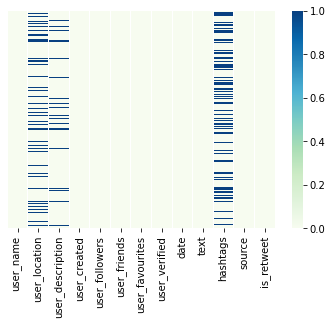

In [ ]:
# Plot for missing values across different columns
missing_graph = sns.heatmap(unprocessed_data.isnull(), cbar=True, yticklabels=False, cmap="GnBu")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


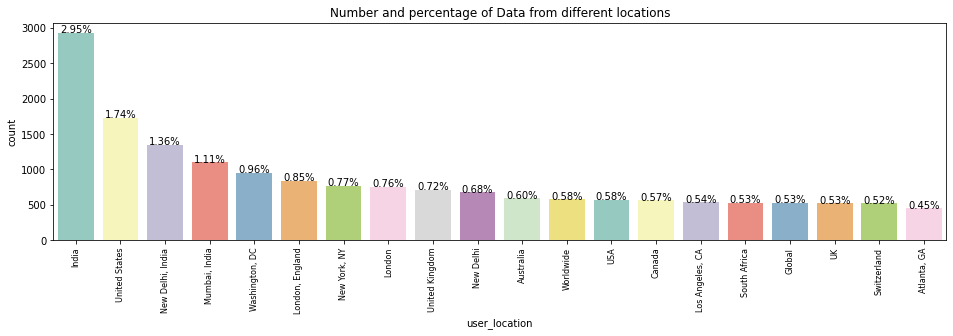

In [ ]:
# Percentage of data from different locations
data_source("user_location", "Data from different locations", data, 4)

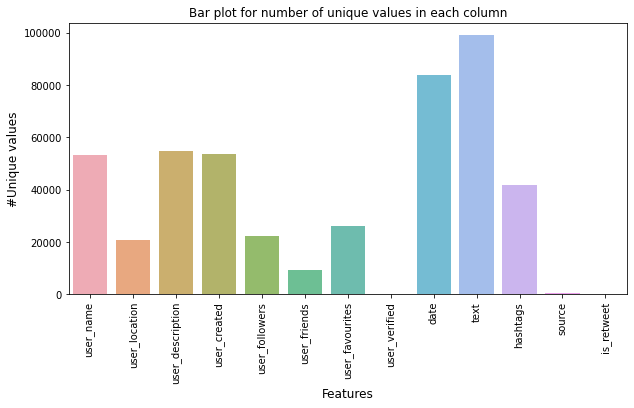

In [ ]:
unique_data = unique_values(data)
f, ax = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x=unique_data['Features'], y=unique_data['Uniques'], alpha=0.8)
plt.title('Bar plot for number of unique values in each column')
plt.ylabel('#Unique values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


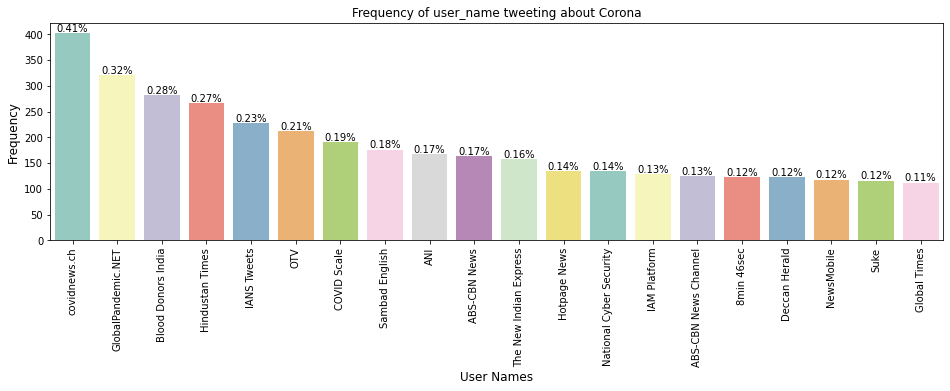

In [ ]:
# Top 20 users based on frequency of tweets
plot_frequency_charts(data, 'user_name', 'User Names')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


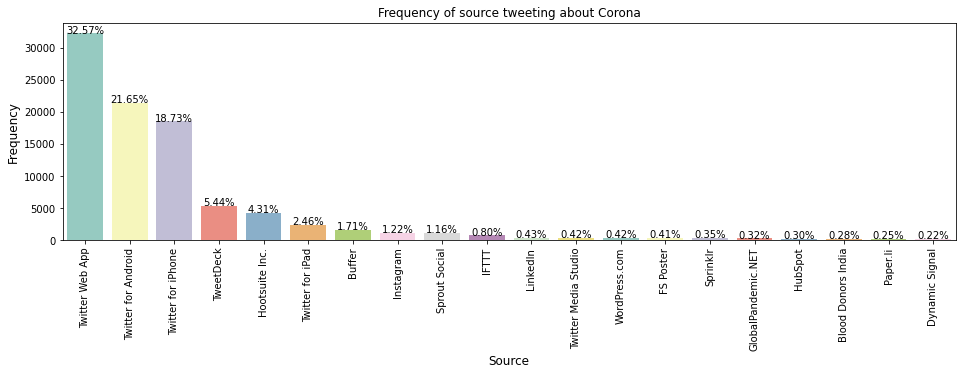

In [ ]:
# Top 20 tweet sources based on frequency of tweets
plot_frequency_charts(data, 'source','Source')

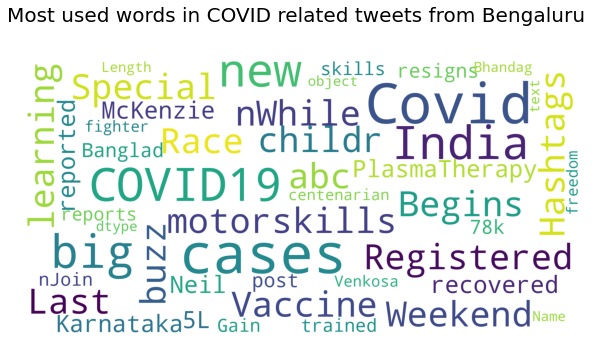

In [ ]:
# WordCloud for top-50 words in tweets from Bangalore
bang_df1 = data.loc[data.user_location == "Bengaluru"]
bang_df2 = data.loc[data.user_location == "Bangalore"]
dfs = [bang_df2, bang_df1]
bang_df = pd.concat(dfs, axis=0, join='inner', ignore_index=False, keys=None,
                    levels=None, names=None, verify_integrity=False, copy=True)
display_wordcloud(bang_df['text'], title = 'Most used words in COVID related tweets from Bengaluru')

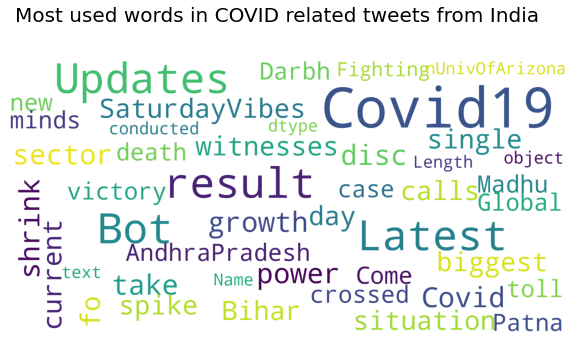

In [ ]:
# WordCloud for top-50 words in tweets from India
india_df1 = data.loc[data.user_location=="India"]
india_df2 = data.loc[data.user_location=="New Delhi, India"]
india_df3 = data.loc[data.user_location=="Mumbai, India"]
india_df4 = data.loc[data.user_location=="New Delhi"]
dfs1 = [india_df1, india_df2, india_df3, india_df4]
india_df = pd.concat(dfs1, axis=0, join='inner', ignore_index=False, keys=None,
                    levels=None, names=None, verify_integrity=False, copy=True)
display_wordcloud(india_df['text'], title = 'Most used words in COVID related tweets from India')

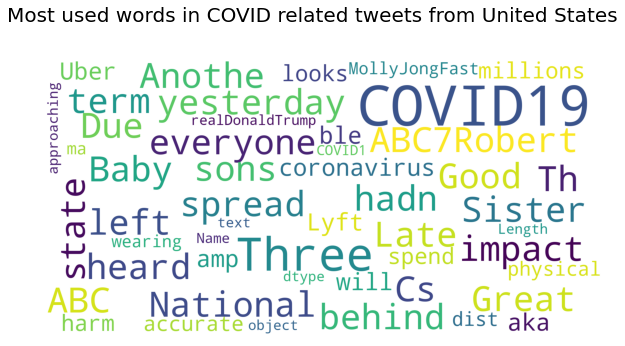

In [ ]:
# WordCloud for top-50 words in tweets from United States of America
usa_df1 = data.loc[data.user_location=="United States"]
usa_df2 = data.loc[data.user_location=="Washington, DC"]
usa_df3 = data.loc[data.user_location=="New York, NY"]
usa_df4 = data.loc[data.user_location=="Los Angeles, CA"]
usa_df5 = data.loc[data.user_location=="USA"]
usa_df6 = data.loc[data.user_location=="California, USA"]
dfs2 = [usa_df1, usa_df2, usa_df3, usa_df4, usa_df5, usa_df6]
usa_df = pd.concat(dfs2, axis=0, join='inner', ignore_index=False, keys=None,
                    levels=None, names=None, verify_integrity=False, copy=True)
display_wordcloud(usa_df['text'], title = 'Most used words in COVID related tweets from United States')